# Titanic Lab

### Step 1: Reading the Data

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
titanic_df = pd.read_csv('train.csv')

In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Step 2: Cleaning the Data

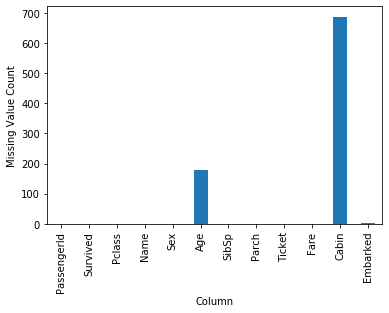

In [59]:
#Create a bar chart showing how many missing values are in each column
# Step 3
titanic_df.isnull().sum().plot(kind='bar');
plt.ylabel('Missing Value Count');
plt.xlabel('Column');

In [60]:
# Which column has the most NaN values? How many cells in that column are empty?

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Q:Which column has the most NaN values? How many cells in that column are empty?

A:The most NaN values can be seen in the Cabin (687) columns, followed by Age (177), and Embarked (2)


In [61]:
# Delete all rows where Embarked is empty

titanic_df = titanic_df[titanic_df['Embarked'].notnull()]

In [62]:
# Fill all empty cabins with ¯\(ツ)/¯
# Note: NaN, empty, and missing are synonymous.

titanic_df.loc[titanic_df['Cabin'].isnull(),'Cabin'] = '¯\(ツ)/¯'

### Step 3: Feature Extraction

In [63]:
#There are two columns that pertain to how many family members are on the boat for a given person. 
###These are SibSp and Parch based on Kaggle's site
#Create a new column called FamilyCount which will be the sum of those two columns.
titanic_df['FamilyCount'] = titanic_df['SibSp'] + titanic_df['Parch']

In [64]:
# Reverends have a special title in their name.
#Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

#Let's insert a new column with value 0 given proportion of priests to all passengers will be low
titanic_df['IsReverend'] = 0

#find the priests, and update the column value for IsReverend
titanic_df.loc[titanic_df['Name'].str.contains('Rev.', regex=False),'IsReverend'] = 1

#take a look to verify
titanic_df['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [65]:
# In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's 
#using pd.get_dummies. Familiarize yourself with the pd.get_dummies documentation

# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
#These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

embarked_dummy_results, sex_dummy_results = pd.get_dummies(titanic_df['Embarked']), pd.get_dummies(titanic_df['Sex'])

print(embarked_dummy_results.shape, sex_dummy_results.shape, titanic_df.shape)

titanic_df = pd.concat([titanic_df,embarked_dummy_results,sex_dummy_results], axis=1)


(889, 3) (889, 2) (889, 14)


In [66]:
#take a look at everything and make sure dummy vars are there as intended
titanic_df.head(2);

In [67]:
# BONUS: Extract the title from everyone's name and create dummy columns
# Step 4: Exploratory analysis
# df.groupby() may be very useful.



### Step 4: Exploratory Analysis

In [68]:
# What was the survival rate overall?
print(f"Total Survival Rate: {int((titanic_df['Survived'].sum() / titanic_df['PassengerId'].count())*100)}%")


Total Survival Rate: 38%


In [69]:
# Which gender fared the worst? What was their survival rate? One way to get this...
print(f"Male Survival Rate: {int((titanic_df.loc[titanic_df['Sex'] == 'male','Survived'].sum() / titanic_df.loc[titanic_df['Sex'] == 'male','PassengerId'].count())*100)}%")
      
print(f"Female Survival Rate: {int((titanic_df.loc[titanic_df['Sex'] == 'female','Survived'].sum() / titanic_df.loc[titanic_df['Sex'] == 'female','PassengerId'].count())*100)}%")

Male Survival Rate: 18%
Female Survival Rate: 74%


In [70]:
# Which gender fared the worst? What was their survival rate? Another way to get this...
titanic_df.groupby('Sex')['Survived'].sum() / titanic_df.groupby('Sex')['PassengerId'].count() *100

Sex
female    74.038462
male      18.890815
dtype: float64

In [71]:
# What was the survival rate for each Pclass?

titanic_df.groupby('Pclass')['Survived'].sum() / titanic_df.groupby('Pclass')['PassengerId'].count() *100

Pclass
1    62.616822
2    47.282609
3    24.236253
dtype: float64

In [72]:
#Did any reverends survive? How many?
titanic_df.loc[titanic_df['IsReverend'] == 1, 'Survived'].sum()

#print result
print(f"{titanic_df.loc[titanic_df['IsReverend'] == 1, 'Survived'].sum()} reverends survived.")

0 reverends survived.


In [73]:
# What is the survival rate for cabins marked ¯\(ツ)/¯

cabin_percent = int(titanic_df.loc[titanic_df['Cabin'] == '¯\(ツ)/¯']['Survived'].sum() / titanic_df[titanic_df['Cabin'] == '¯\(ツ)/¯']['PassengerId'].count() * 100)

print(f"Survival rate of {cabin_percent}%")

Survival rate of 29%


In [74]:
# What is the survival rate for people whose Age is empty?

age_empty_percent = int(titanic_df.loc[titanic_df['Age'].isnull()]['Survived'].sum()  / titanic_df.loc[titanic_df['Age'].isnull()]['PassengerId'].count() * 100)

print(f"Survival rate of {age_empty_percent}%")

Survival rate of 29%


In [75]:
# What is the survival rate for each port of embarkation?
titanic_df.groupby('Embarked')['Survived'].sum() / titanic_df.groupby('Embarked')['PassengerId'].count() *100

Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64

In [76]:
# What is the survival rate for children (under 12) in each Pclass?
print(titanic_df[titanic_df['Age'] < 12].groupby('Pclass')['Survived'].sum() / titanic_df[titanic_df['Age'] < 12].groupby('Pclass')['PassengerId'].count() * 100)
                                 
#Class 2 looks odd, let's investigate further to see if 100% survival here is a real thing 
#In looking at this age group for Pclass 2, it looks like everyone survived in this age bracket (1= Survived)
titanic_df.loc[(titanic_df['Age'] < 12) & (titanic_df['Pclass'] == 2),'Survived'].value_counts()

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64


1    17
Name: Survived, dtype: int64

In [77]:
# Did the captain of the ship survive? Is he on the list?
print(titanic_df.loc[titanic_df['Name'].str.contains('Capt', regex=False),['Embarked','Survived']])

print("The captain embarked from Southampton, but did not survive.")

    Embarked  Survived
745        S         0
The captain embarked from Southampton, but did not survive.


In [78]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic_df.loc[titanic_df['Survived'] == 0,['Name','Ticket','Fare']].sort_values('Fare', ascending=False).head(2)

,Name,Ticket,Fare
27,"Fortune, Mr. Charles Alexander",19950,263.0
438,"Fortune, Mr. Mark",19950,263.0


In [79]:
# Does having family on the boat help or hurt your chances of survival?
family_mask = ~(titanic_df['SibSp'] == 0) & ~(titanic_df['Parch'] == 0)

fam_survival = (titanic_df.loc[family_mask,'Survived'].sum() / titanic_df.loc[family_mask,'PassengerId'].count())*100
no_fam_survival = (titanic_df.loc[~family_mask,'Survived'].sum() / titanic_df.loc[~family_mask,'PassengerId'].count())*100

print(f"Having either siblings or parents on board increased your chance of survival by {int(((fam_survival - no_fam_survival) / no_fam_survival)*100)}%")
print(f"Any Family Survival Rate: {int(fam_survival)}%, No Family Survival Rate: {int(no_fam_survival)}%")

Having either siblings or parents on board increased your chance of survival by 17%
Any Family Survival Rate: 43%, No Family Survival Rate: 37%


### Step 5: Plotting

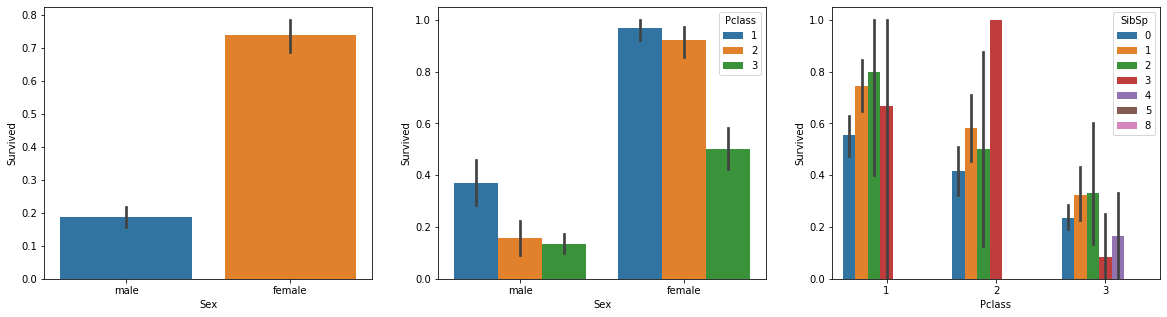

In [80]:
import seaborn as sns
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
ax = sns.barplot(
        x='Sex',
        y='Survived',
        data=titanic_df,
    )



plt.subplot(1,3,2)
ax = sns.barplot(
        x='Sex',
        y='Survived',
        hue='Pclass',
        data=titanic_df,
    )

plt.subplot(1,3,3)
ax = sns.barplot(
        x='Pclass',
        y='Survived',
        hue='SibSp',
        data=titanic_df,
    );


